(Pour le nettoyage des données, se référer au notebook [Data Cleaning](./Data_cleaning.ipynb) (./Data_cleaning.ipynb), Ce fichier ne s'occupera que de l'analyse du jeu de données.)


Pour commencer, on va d'abord importer toutes les librairies dont nous aurons besoin lors de cette analyse :

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import gaussian_kde
from sklearn.preprocessing import LabelEncoder
from IPython.display import display,HTML

# Problématique

Voici la problématique générale à laquelle nous souhaitons répondre dans cette analyse :

> _**Existe t-il des profils types de Pokémon selon leur catégorie ou leur type ?**_

---

Cette question sera découpée en plusieurs morceaux afin de faire des sous-problématiques plus ciblées, qui pourront nous éclaircir ou nous donner des parts de réponses.

Par exemple : **Les pokémons de type Dragon sont-ils statistiquement plus puissants que les autres types ?** (et autres...)

On cherchera surtout des catégories qui sortent du lot, ou des **Plus fort / Moins Fort** (en termes de variables de combat, puissance, etc...)

---

On commence avant tout par ouvrir le fichier csv avec pandas :

In [4]:
dfPokemon = pd.read_csv('./Datasets/MP-24-25_Cleaned.csv')

In [5]:
dfPokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   object 
 3   generation        1045 non-null   int64  
 4   status            1045 non-null   object 
 5   species           1045 non-null   object 
 6   type_number       1045 non-null   int64  
 7   type_1            1045 non-null   object 
 8   type_2            553 non-null    object 
 9   height            1045 non-null   float64
 10  weight            1045 non-null   float64
 11  abilities_number  1045 non-null   int64  
 12  ability_1         1042 non-null   object 
 13  ability_2         516 non-null    object 
 14  ability_hidden    813 non-null    object 
 15  total_points      1045 non-null   int64  
 16  hp                1045 non-null   int64  


La colonne *'Unnamed: 0'* s'est glissé dans notre dataset, avant de continuer notre analyse, on va simplement retirer cette colonne :

In [7]:
dfPokemon = dfPokemon.drop(columns='Unnamed: 0')

# Définition des variables qui nous intéresseront dans notre étude, et Quantitatives/Qualitatives

> On ignorera les variables :
> - pokedex_number (simple index qui augmente, ça n'apporte pas d'intérêt de l'analyser)
> - name (même raisonnement, la colonne n'apporte pas d'éléments statistiques)
> > ce sont quand même deux colonnes que l'on gardera sans analyser pour les différencier, car certains pokémons existent sous plusieurs formes, et l'index du tableau ne reflète pas celui du numéro de pokédex. (identification)
> - ablities_number
> - ability_1
> - ability_2
> - hidden_ability
> - base_friendship
> - growth_rate
> - egg_types_number
> - egg_type_1
> - egg_type_2
> - percentage_male
> - egg_cycles

On pourra peut être se servir des variables ***height et weight***, pour voir si le poids influe ou non sur certaines performances

les variables **against_\*** nous servirons dans l'analyse bivariée.

> même si l'analyse pourrait être très intéressante, on ne considèrera pas les données sur les oeufs ici.

Pour le reste des variables :

> **1. Qualitatives :**
>    - status (Normal, demi-légendaire, mythique, etc.)
>    - species
>    - type_1
>    - type_2
>    - generation
> 
> **2. Quantitatives:**
>    - height
>    - weight (potentiellement utilisables)
>    - total_points
>    - hp
>    - attack
>    - defense
>    - sp_attack
>    - sp_defense
>    - speed
>    - catch_rate
>    - base_experience
>    - against_* (pour étudier les faiblesses plus tard)

# Analyse univariée

## Analyse des variables quantitatives

Notre étude débutera donc avec une analyse univariée des variables quantitatives (utiles à notre exploration) de notre dataset nettoyé :

> Pour rappel, la signification des variables :
> - Count : le compte total de valeurs non nulles dans la colonne
> - mean : la moyenne des valeurs de la colonne
> - 25, 50, 75 : Valeur au 25ème centile, Valeur médiane et Valeur au 75ème centile
> - min, max : Valeurs minimales et maximales de la colonne
> - Kurtosis : Dispersion des données (Plutôt en pic ou plat ?)
> - Skewness : Distribution des données (plutôt penchée à gauche ou à droite ?)

Les boxplots (boîtes à moustaches) fonctionnent de la manière suivante :

Les moustaches représentent le maximum et minimum, que l'on peut retrouver dans la description au dessus.

La boite de couleur représente toutes les valeurs entre le 25ème et 75ème centile, comme mentionné précédemment.

La ligne dans la boîte de couleur (généralement orange) représente la valeur médiane.

***Les variables de statistiques auront droit à une analyse particulière pour leur analyse, et seront donc exclues de cette mini analyse, on fera une observation de ces variables avant de passer aux stats***

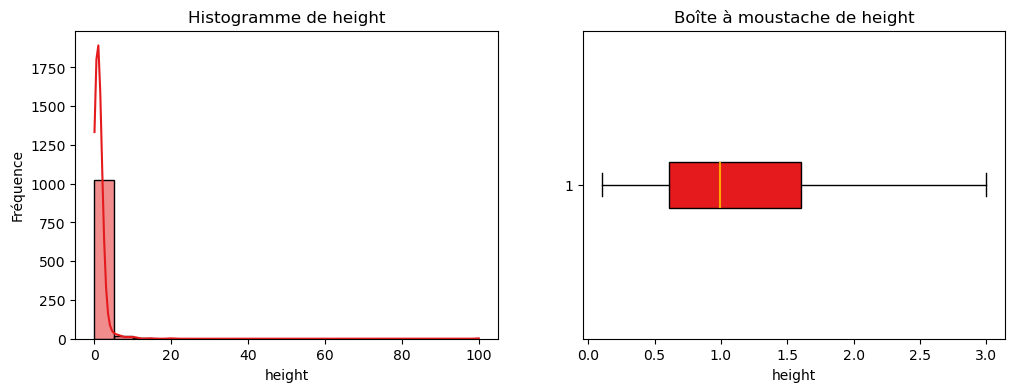

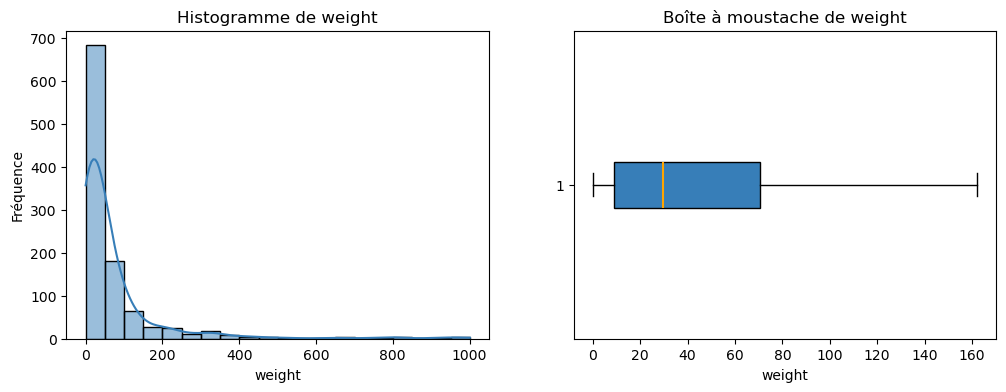

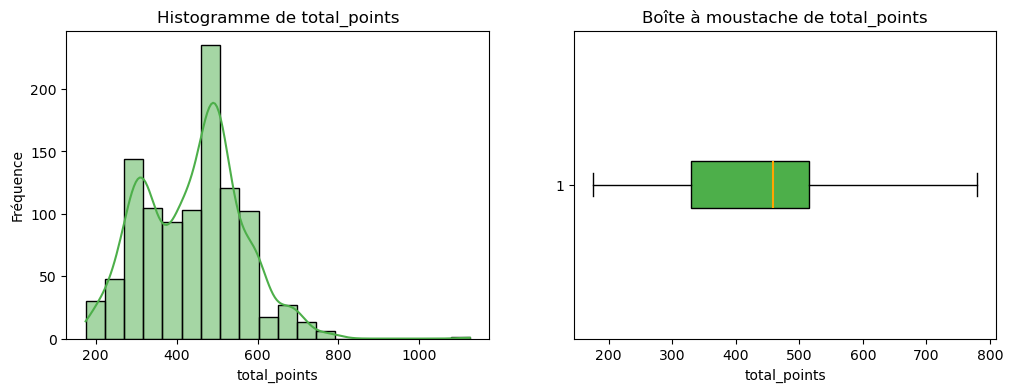

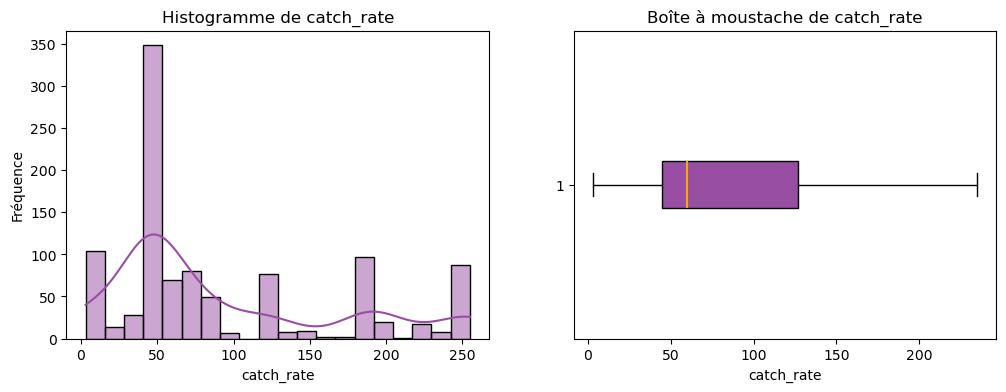

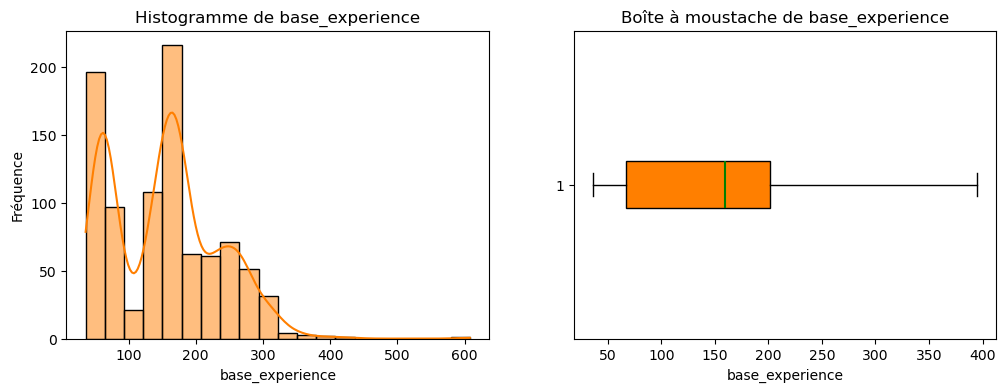

In [10]:
univarColumnList = ['height', 'weight', 'total_points', 'catch_rate', 'base_experience']
Colors = sns.color_palette('Set1')

for index, column in enumerate(univarColumnList):
    stats = dfPokemon[column].describe()
    stats['kurtosis'] = dfPokemon[column].kurt()
    stats['skewness'] = dfPokemon[column].skew()

    html_block = f"""
    <div style="border:1px solid #ddd; padding:12px; margin-top:20px; margin-bottom:10px; border-radius:8px; background-color:#fefefe">
        <h3 style="margin-top:0;">Analyse univariée : <i>{column}</i></h3>
        <ul style="margin-left:15px;">
            <li><b>Count</b> : {stats['count']:.0f}</li>
            <li><b>Mean</b> : {stats['mean']:.2f}</li>
            <li><b>Std</b> : {stats['std']:.2f}</li>
            <li><b>Min</b> : {stats['min']:.2f}</li>
            <li><b>25%</b> : {stats['25%']:.2f}</li>
            <li><b>50% (Median)</b> : {stats['50%']:.2f}</li>
            <li><b>75%</b> : {stats['75%']:.2f}</li>
            <li><b>Max</b> : {stats['max']:.2f}</li>
            <li><b>Skewness</b> : {stats['skewness']:.2f}</li>
            <li><b>Kurtosis</b> : {stats['kurtosis']:.2f}</li>
        </ul>
    </div>
    """
    display(HTML(html_block))

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(dfPokemon[column].dropna(), bins=20, kde=True, color=Colors[index], ax=axes[0])
    axes[0].set_title(f"Histogramme de {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Fréquence")

    axes[1].boxplot(dfPokemon[column].dropna(), vert=False, showfliers=False, patch_artist=True, boxprops = dict(facecolor = Colors[index]), medianprops = dict(color = 'orange' if index != 4 else 'green', linewidth = 1.5))
    axes[1].set_title(f"Boîte à moustache de {column}")
    axes[1].set_xlabel(column)
    plt.show()

> **Il est important de noter que les boîtes à moustaches ont été tronquées et que les valeurs "outliers" ont été exclues de l'affichage, car certaines variables sont très éparpillées et auraient rendu l'affichage illisible**

Analyse des variables et hypothèses :

Pour la plupart des variables, un Pokémon se distingue particulièrement et génère des valeurs absurdes (surtout dans masse et taille) : Ethernatos Etermax (pokémon le plus grand, plus lourd et avec le plus de statistiques de base pour sa version Infinimax), on ignorera la plupart des observations causées par ce pokémon, pour se concentrer sur un tout plûtot qu'une anomalie.

1. height

   La variable height est très concentrée sur l'intervalle \[ 0.6;1.6 \] et n'est pas du tout symétrique. La valeur de kurtosis et l'écart type indiquent tous les deux que les valeurs sont fortement condensées. La taille maximale observée est de 100m. Considéré le manque d'hétérogénéité de la variable, il est peu probable que la taille ait une influence sur l'existance d'un profil type de Pokémon (pour les pokemons Normaux). Il est cependant possible que les pokémons légendaires présentent une taille plus élevée 

2. weight

   Même remarque que pour height, la variable weight est plus dispersée, mais ne présente pas beaucoup plus de symétrie. la valeur kurtosis et l'écart-type étant très élevés, cela prouve que la densité est fortement concentrée autour de la moyenne. weight a aussi probablement peu d'impact dans le profilage des Pokémons normaux.


Hypothèse : Comme les deux variables weight et height présentent des profils d'histogrammes similaires, il est logique de penser que plus un Pokémon est grand; plus il est susceptible d'être lourd (et inversement). La matrice de corrélation nous aidera surement à voir si les deux variables sont effectivement fortement corrélées ou non.

3. total_points

   La variable total points se comporte de manière assez logique et est assez symétrique en plus d'être équilibrée . on remarque qu'elle pointe surtout autour des valeurs \~300 et \~500. Autour de ces valeurs, on remarque quand même une fréquence assez élevée d'autres Pokémons. les indices Skewness et Kurtosis sont très faibles, ce qui indique une bonne répartition des valeurs, malgré un écart type important. On observe une brutale chute de la fréquence à partir de 600.

Hypothèses : 
- Les Pokémons à plus de 600 points au total sont probablement corrélés à leur statut (normal, demi-légendaire, légendaire, mythique, etc.)
- Les plus gros pics de fréquence sont dus aux Pokémons ayant deux évolutions, une donnée que nous n'avons pas dans ce dataset, mais qui serait intéressante à analyser et qui me semble le plus probable, comme la plupart des pokémons ont deux ou trois évolutions, les stats doivent plus ou moins finir en quinconce, car en général, les pokémons à trois evolutions sont plus puissants que ceux à 1 ou 2.

4. catch_rate

   La variable catch_rate est une variable assez difficile à interpréter car elle dépend de la méthode de calcul du jeu utilisé, et il n'est pas précisé, que ce soit dans le sujet ou sur le dataset dans kaggle, de quel jeu est extrait le rate proposé ici. il sera donc necessaire de faire une analyse rapide pour savoir comment interpréter la valeur du catch_rate d'un Pokémon. d'après bulbapedia (Poképedia anglais), le taux attribué à chaque pokemon est toujours situé entre 3 et 255, même si l'algorithme de calcul pour la capture est différent dans chaque jeu (voir [List of Pokémons by catch rate](https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_catch_rate)). La variable est assez bien équilibrée (en regardant l'indice Kurtosis), et présente plusieurs gros pics à \[\~10, 45, 75, 90, \~120, 190, 255\].

Hypothèse : les valeurs de catch_rate, qui se situent entre 3 et 255, indiquent que plus le taux est bas, plus il est difficile de capturer le Pokémon.

5. base_experience

   Contrairement à ce qu'on pourrait penser au départ, la variable 'base_experience' ne représente pas le taux de base (au niveau 1) d'experience à obtenir pour faire augmenter le Pokémon. Ce taux représente simplement la quantité d'expérience obtenue lorsque le pokemon (sauvage) est vaincu. Il existe bel et bien une variable qui définit la quantité à obtenir pour faire augmenter le niveau, ou à quelle vitesse notre Pokémon évolue, mais c'est plus une question de catégorie de "courbe", plûtot qu'une variable individuelle. la variable est bien équilibrée et assez symétrique (voir nos deux indices habituels), on note que chaque Pokémon rapporte au minimum 36 points d'expériences quand ils sont vaincus.

   Pour plus de détails sur le fonctionnement de l'expérience : [Courbe d'expérience](https://www.pokepedia.fr/Courbe_d%27exp%C3%A9rience) (Poképédia)
   Pour faire simple, voici le diagramme représentant les différentes courbes possibles (source : Poképédia) :
   ![diagramme des courbes](.\images\Comparatif_courbe_experience.PNG)

Hypothèses : 

- Plus un pokémon est rapporte d'experience une fois vaincu, plus il est puissant.
- Plus un pokémon rapporte d'experience une fois vaincu, plus il est difficile à capturer.

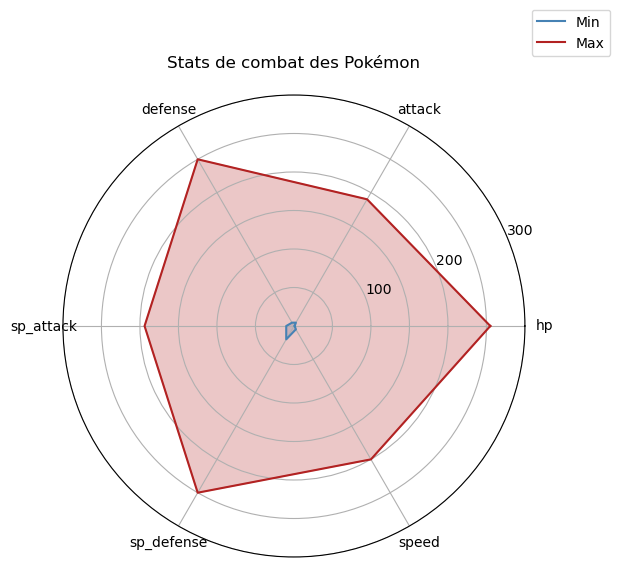

In [12]:
combat_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

min_vals = dfPokemon[combat_stats].min().values
max_vals = dfPokemon[combat_stats].max().values

min_vals = np.append(min_vals, min_vals[0])
max_vals = np.append(max_vals, max_vals[0])

angles = np.linspace(0, 2 * np.pi, len(combat_stats), endpoint=False)
angles = np.append(angles, angles[0])

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, min_vals, label='Min', color='steelblue')
ax.fill(angles, min_vals, color='steelblue', alpha=0.25)

ax.plot(angles, max_vals, label='Max', color='firebrick')
ax.fill(angles, max_vals, color='firebrick', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(combat_stats)
ax.set_yticks([50, 100, 150, 200, 250, 300])
ax.set_yticklabels(['', '100', '', '200', '', '300'])
ax.set_title("Stats de combat des Pokémon", pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

plt.show()

**On voit bien que la répartition des statistiques est très parsemée.**

On va ajuster le minimum (on le multiplie x3) pour faire une analyse plus poussée :

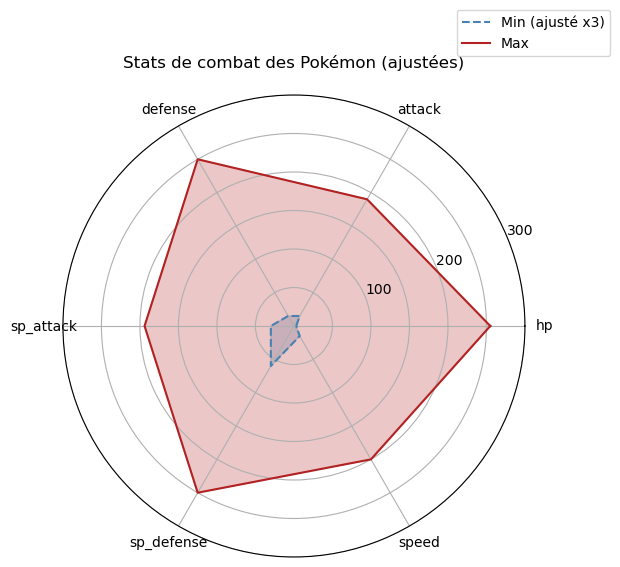

In [14]:
min_coeff = 3.0 

min_vals_adjusted = min_vals * min_coeff

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, min_vals_adjusted, label='Min (ajusté x3)', color='steelblue', linestyle='--')
ax.fill(angles, min_vals_adjusted, color='steelblue', alpha=0.25)

ax.plot(angles, max_vals, label='Max', color='firebrick')
ax.fill(angles, max_vals, color='firebrick', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(combat_stats)
ax.set_yticks([50, 100, 150, 200, 250, 300])
ax.set_yticklabels(['', '100', '', '200', '', '300'])
ax.set_title("Stats de combat des Pokémon (ajustées)", pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

plt.show()

On remarque assez facilement que :
 -  hp est la variable avec l'écart min/max le plus élevé (et le minimum le plus bas)
 -  paradoxalement, hp est aussi la variable la plus elévée
 -  sp_def est la moins écartée et a le minimum le plus élevé
 -  attack a le maximum le plus bas

> On ne remarque cependant pas de tendance particulière et que les pokémons sont très différents les uns des autres, ce qui consolide l'hypothèse d'une possible catégorisation ou l'existance de "profils types"

On trace un graphique type boxplot et violon sur ces stats pour faire apparaitre la densité et la fréquence des valeurs :

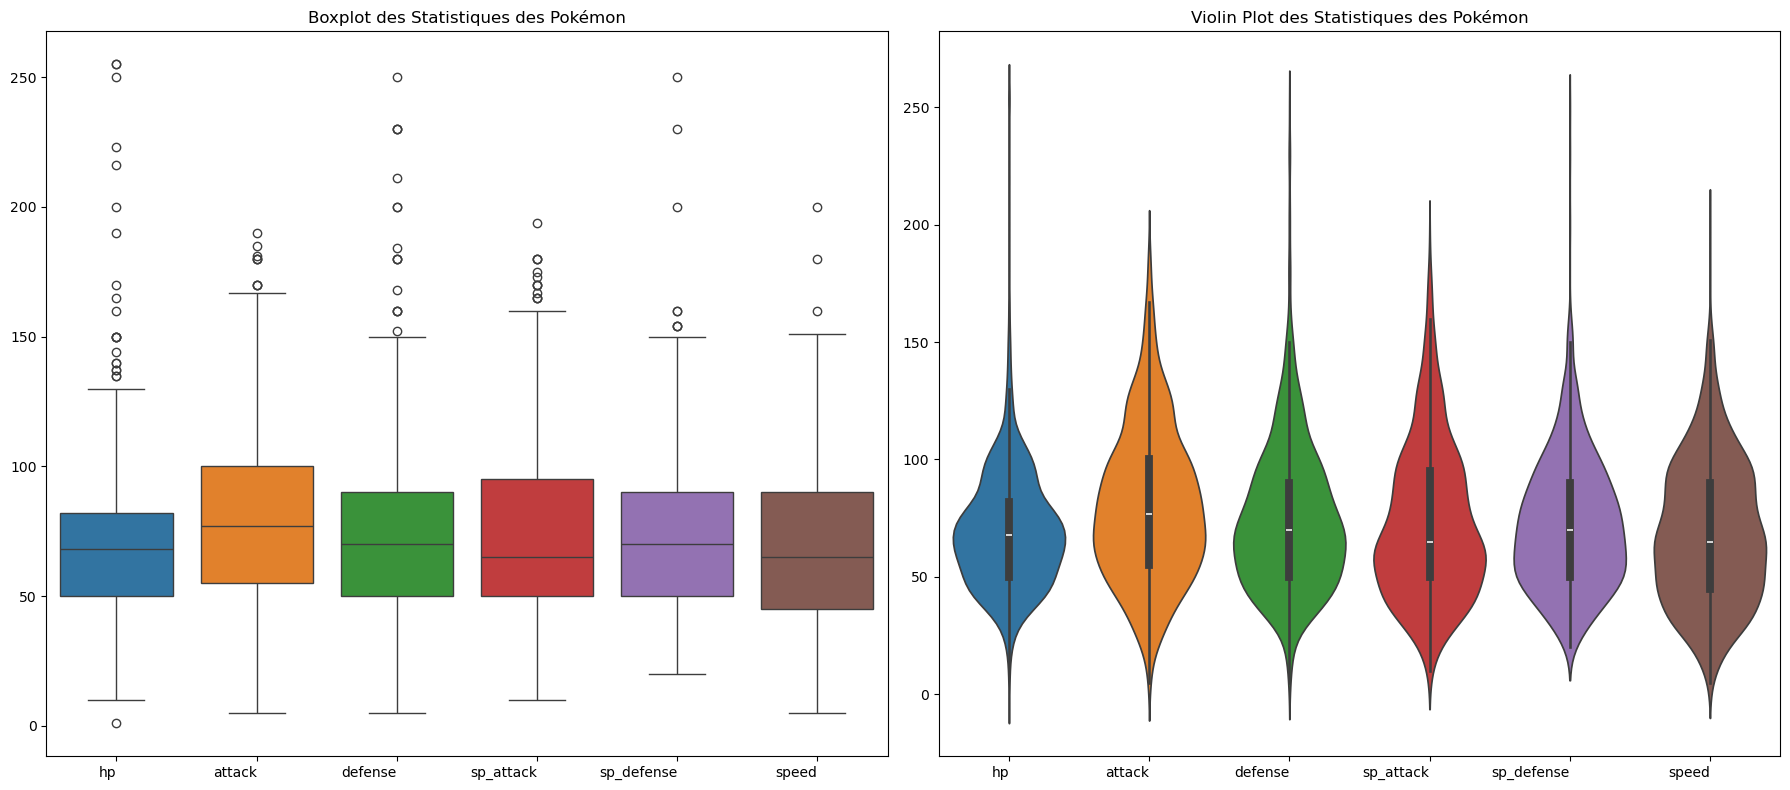

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.boxplot(data=dfPokemon[combat_stats], ax=axes[0])
axes[0].set_title('Boxplot des Statistiques des Pokémon')
axes[0].set_xticks(range(len(combat_stats)))
axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')

sns.violinplot(data=dfPokemon[combat_stats], ax=axes[1])
axes[1].set_title('Violin Plot des Statistiques des Pokémon')
axes[1].set_xticks(range(len(combat_stats)))
axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')

plt.tight_layout()
plt.show()

On remarque que la moyenne la plus haute est celle de l'attaque, et sp_attack la plus faible paradoxalement

Les valeurs extrêmes sur la variable hp apparaissent d'autant plus sur la boite à moustache.

Sur le diagramme en violon, on voit que speed est la variable la plus répartie et hétérogène, la densité étant fortement élevée tout le long du violon

> Dans l'ensemble, toutes les variables semblent assez bien réparties, et sont équilibrées, une variable ne prend pas le dessus sur les autres, et on se retrouve avec 95% des valeurs entre 20 et 200

## Analyse des variables qualitatives

On effectue désormais une analyse univariée des variables qualitatives

On commence par la répartition des types dans notre dataset :

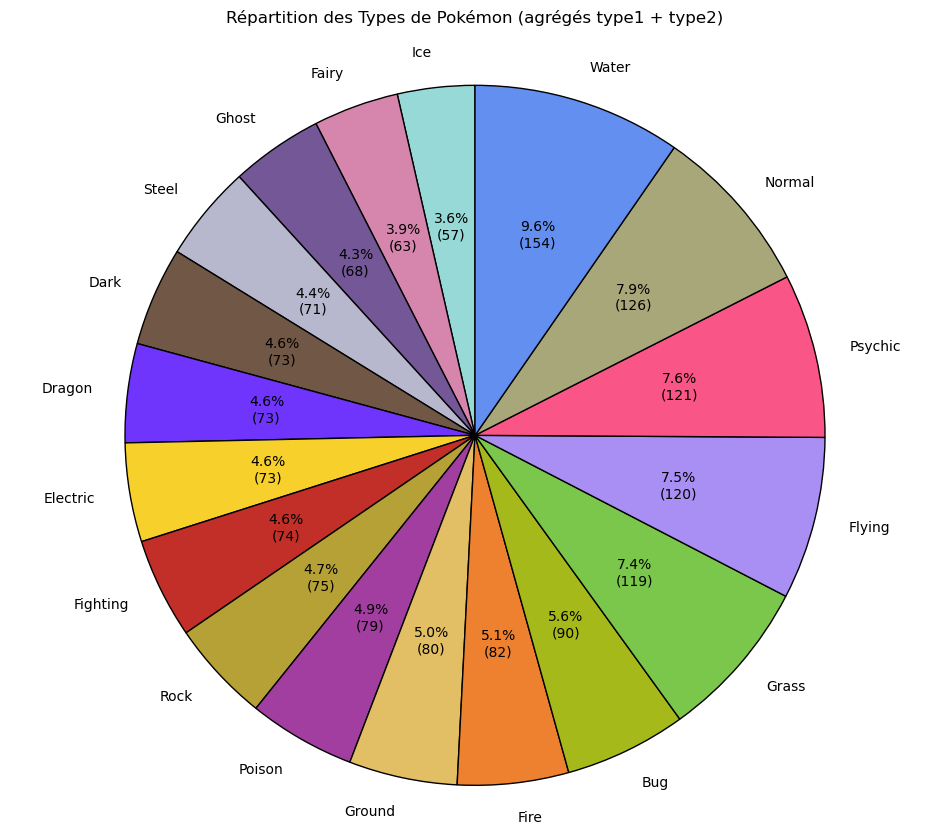

Total : 1598


In [18]:
type_counts = dfPokemon['type_1'].value_counts() + dfPokemon['type_2'].value_counts()
type_counts = type_counts.sort_values(ascending=True)

color_dict = {
    'Normal': '#A8A77A',
    'Fire': '#EE8130',
    'Water': '#6390F0',
    'Electric': '#F7D02C',
    'Grass': '#7AC74C',
    'Ice': '#96D9D6',
    'Fighting': '#C22E28',
    'Poison': '#A33EA1',
    'Ground': '#E2BF65',
    'Flying': '#A98FF3',
    'Psychic': '#F95587',
    'Bug': '#A6B91A',
    'Rock': '#B6A136',
    'Ghost': '#735797',
    'Dragon': '#6F35FC',
    'Dark': '#705746',
    'Steel': '#B7B7CE',
    'Fairy': '#D685AD'
}

colors = [color_dict[type_] for type_ in type_counts.index]

def custom_autopct(pct, allvals):
    total = sum(allvals)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val:d})'


plt.figure(figsize=(12, 10))
plt.pie(type_counts, labels=type_counts.index, autopct=lambda pct: custom_autopct(pct, type_counts), startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Répartition des Types de Pokémon (agrégés type1 + type2)', pad=20)
plt.axis('equal')
plt.show()

print(f"Total : {type_counts.sum()}")

Observations :
- Water est la variable la plus représentée avec 154 Pokémons ayant au moins un des deux de leur type étant Eau.
- Ice est la moins représentée avec seulement 57 Pokémons, c'est assez surpenant.
- On sait que le total représenté ici est de 1598 types. on sait donc que parmis nos 1045 lignes -> 1598 - 1045 = 553 Pokémons ayant un double type (553/1045 = 52.9% des pokémons ont un double type !)
- Il est en soit logique que le type "normal" se hisse en deuxième place, car la plupart des pokémons de type "vol" des anciennes générations ont le double type "normal"

Les types semblent être aussi bien équlibrés que les statistiques présentées au dessus.

Hypothèse : Il existe un type de Pokémon présentant des statistiques plus élevées que les 

Passons à la répartition des espèces :

On a essayé d'afficher nos espèces sous forme de barplot, mais il semblerait que la variable espèce contienne trop de valeurs différentes, ce qui limite fortement son intérêt dans notre usage ici. On va donc simplement seulement récupérer les espèces avec strictement plus de 2 représentants par type. On les affichera dans un barplot.

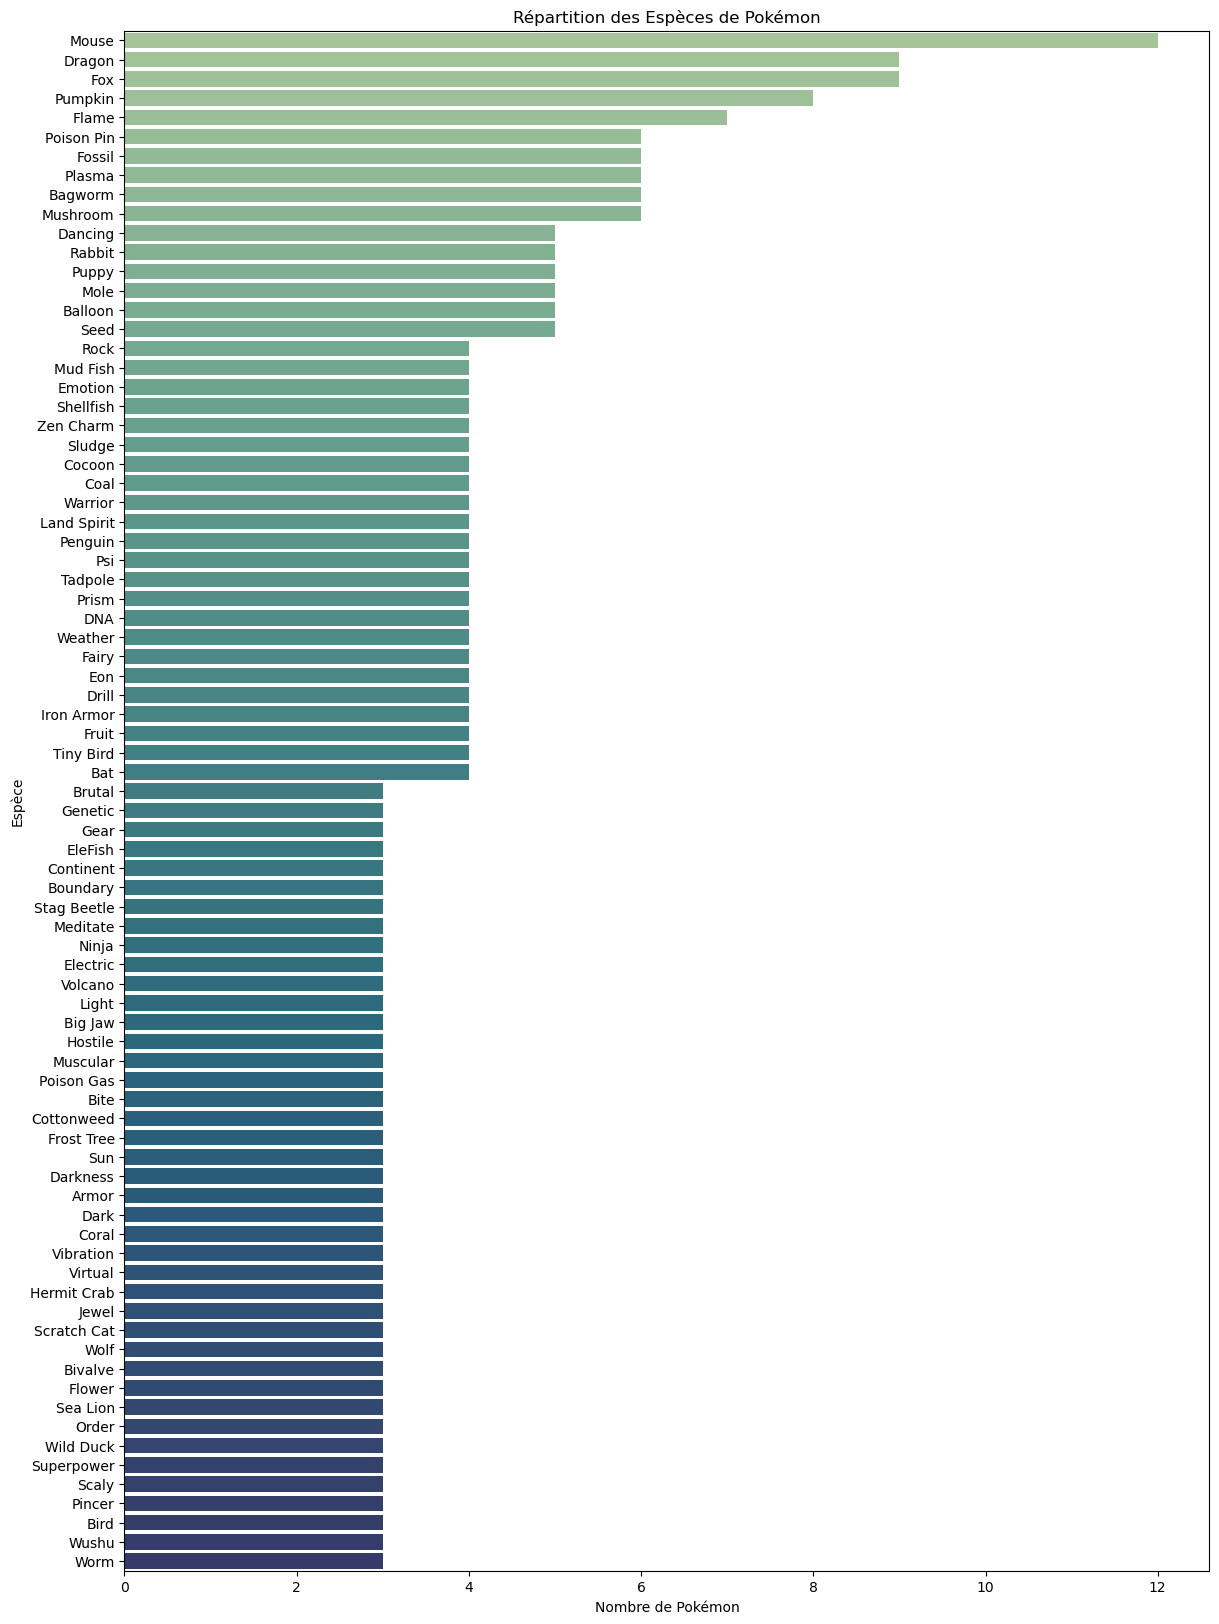

In [34]:
species_counts = dfPokemon['species'].value_counts()

displayed_species_counts = species_counts[species_counts.values > 2]
displayed_species_counts

plt.figure(figsize=(14, 20))
sns.barplot(y=displayed_species_counts.index, x=displayed_species_counts.values, hue=displayed_species_counts.index, palette='crest')
plt.title('Répartition des Espèces de Pokémon')
plt.xlabel('Nombre de Pokémon')
plt.ylabel('Espèce')
plt.show()

On observe que les 5 espèces les plus représentées sont : Mouse (12 occurences), Dragon (9 occurences), Fox (9 occurences), Pumpkin (8 occurences) et Flame (7 occurences)

Il apparait clairement que les espèces de pokémons sont très diversifiées, car la plupart des espèces ne possèdent qu'un seul ou deux représentant(s)

In [56]:
print(f"Seulement {round(displayed_species_counts.value_counts().sum() / species_counts.value_counts().sum(), 4) * 100}% des espèces ont été représentées dans ce graphique, ce qui prouve que les Pokémons sont très diversifiés")

Seulement 12.27% des espèces ont été représentées dans ce graphique, ce qui prouve que les Pokémons sont très diversifiés


Hypothèse : Les espèces les plus représentées fondent-elles un profil type en statistiques ? en masse/taille ? en types ? en taux de capture ?

Continuons en étudiant les statuts des pokémon (Normal, Sous-légendaire, légendaire, mythique) :

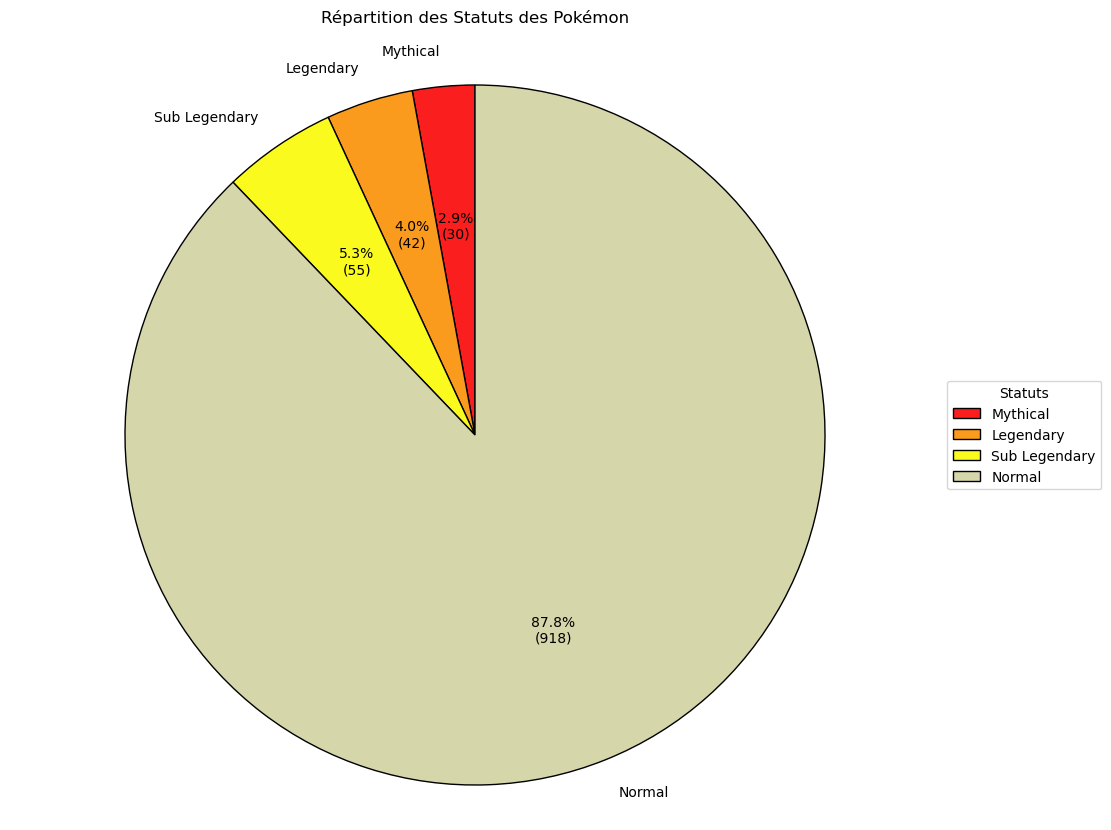

In [94]:
status_counts = dfPokemon['status'].value_counts()

status_counts = status_counts.sort_values(ascending=True)

status_colors = ['#fa1e1e','#fa9b1e','#fafa1e','#d6d6ab']

def custom_autopct(pct, allvals):
    total = sum(allvals)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val:d})'


plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(status_counts, labels=status_counts.index, autopct=lambda pct: custom_autopct(pct, status_counts), startangle=90, colors=status_colors, wedgeprops={'edgecolor': 'black'})
plt.title('Répartition des Statuts des Pokémon', pad=20)
plt.axis('equal') 


plt.legend(wedges, status_counts.index, title="Statuts", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Il existe en tout 4 statuts de pokémons : Normal, Semi-légendaire, Légendaire, Mythique.

On observe que 87.8% des pokémons sont normaux, ce qui est un score en réalité assez bas quand on y réfléchit une deuxième fois.

En termes de statistiques de base, les Pokémon de statut 'Légendaire' ont en moyenne des statistiques de base plus élevées que les Pokémon de statut 'Normal'. On explorera cette question plus tard dans le document

Hypothèses/Questions :
 - Quelle est réellement la différence de statistiques entre les pokémons légendaires et non légendaires ?
 - Y-a t'il un type plus représenté parmis les pokémons non normaux ? 
